In [75]:
import pandas as pd
import numpy as np
import xarray as xr
import datashader as ds
import math
import matplotlib.pyplot as plt
import datashader.transfer_functions as tf

Moving dataset visualization

In [76]:
def visualize_moving_dataset(arr, start, n, speed):
    moveDist = speed
    while True:
        data = {"x": np.arange(start, start+n), "y": arr[start:start+n]}
        df = pd.DataFrame(data)
        cvs = ds.Canvas(x_range=(start, start+n-1), y_range=(np.min(arr[start:start+n]), np.max(arr[start:start+n])), plot_height=250, plot_width=1200)
        img = tf.shade(cvs.line(df, 'x', 'y'), cmap=['red'])

        # Display the image
        display(img)
        
        # Input for navigation
        #isRight = input("< move >: ") == ">"
        isRight = True
        start += moveDist if isRight else -moveDist
        start = max(start, 0)
        
        # Clear the output for the next image
        clear_output(wait=True)

In [78]:
from IPython.display import display, clear_output

arr = np.fromfile("continuous-tests/shortsine-1m.in", sep="", dtype=np.float32)
visualize_moving_dataset(arr, 0, 1000, 5)

KeyboardInterrupt: 

In [80]:
extrap_errors = np.fromfile("out/continuous-tests/shortsine-1m.in-compressed.bin-extrap-errors.txt", sep="\n", dtype=np.float32)
visualize_moving_dataset(extrap_errors, 0, 3000, 10)

KeyboardInterrupt: 

Histogram

In [64]:
quantization_levels = np.fromfile("out/continuous-tests/shortsine-1m.in-compressed.bin-quantization-levels.txt", sep="\n", dtype=np.float32)

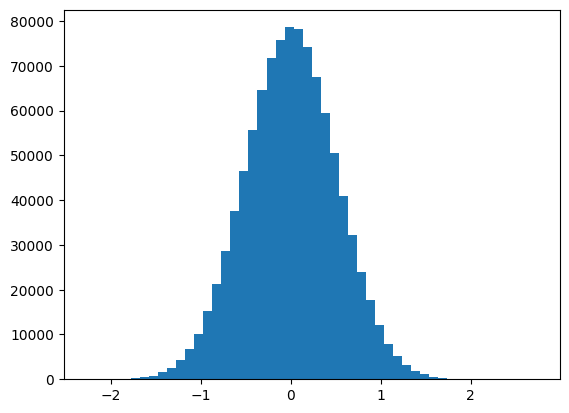

In [73]:
# Create the histogram
plt.hist(extrap_errors, bins=50)
plt.show()

In [18]:
np.mean(np.abs(extrap_errors))

0.7208021

In [24]:
original = np.fromfile("continuous-tests/shortsine-1m.in", sep="", dtype=np.float32)
decompressed = np.fromfile("out/continuous-tests/shortsine-1m.in-decompressed.bin", sep="", dtype=np.float32)
diff = decompressed - original

In [33]:
np.max(diff / np.ptp(original))

0.0010000021